In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Also lets import warnings module to get rid of warnings from code
# warnings is base class of all warning category classes. It is subclass of exception
#"default"-print the first occurrence of matching warnings for each location (module + line number) where the warning is issued
#"error"-turn matching warnings into exceptions
#"ignore"-never print matching warnings
#"always"-always print matching warnings
#"module"-print the first occurrence of matching warnings for each module where the warning is issued (regardless of line number)
#"once"-print only the first occurrence of matching warnings, regardless of location

import warnings
warnings.filterwarnings('ignore')

In [80]:
# Now for analysis purpose we will read the CSV file we extracted post feature engineering
# r before path name stands for raw and would reach backslashes as it is instead of special character

df=pd.read_csv(r'D:\Akshay\Python Projects\Naukri.com Analysis\Datasets/naukri_data.csv')

df.head(6)

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_exp,max_exp,avg_exp,min_pay,max_pay,avg_payrate,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,0.0,1.0,0.5,150000.0,225000.0,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,0.0,0.0,0.0,150000.0,250000.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bangalore,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,4.0,8.0,6.0,NaN,NaN,NaN,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bangalore, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,NaN,Accounts,11.0,15.0,13.0,NaN,NaN,NaN,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bangalore,JAVA Technical Lead (6-8 yrs) -,4.0,NaN,IT Software - Application Programming,6.0,8.0,7.0,NaN,NaN,NaN,13.0,10.0,2016.0
5,PFS Web Global Services Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,131016005070,Bangalore,WALK IN - As400 Developer - Pfsweb Global Serv...,NaN,NaN,IT Software - Application Programming,2.0,5.0,3.5,NaN,NaN,NaN,13.0,10.0,2016.0


## First we will perform some descritive analysis on this

In [81]:
df.describe()

,jobid,numberofpositions,min_exp,max_exp,avg_exp,min_pay,max_pay,avg_payrate,day,month,year
count,2.200000e+04,4464.000000,21884.000000,21884.000000,21884.000000,4.641000e+03,4.940000e+03,4.640000e+03,21977.000000,21977.000000,21977.000000
mean,1.561171e+11,45.116935,3.600987,7.117803,5.359395,4.493986e+05,7.342964e+05,6.149812e+05,18.849934,7.224189,2015.750648
std,9.423956e+10,186.197193,3.100532,3.923900,3.444409,5.509237e+05,7.559780e+05,6.442135e+05,9.751744,4.062145,0.450577
min,1.011600e+10,1.000000,0.000000,0.000000,0.000000,1.500000e+01,1.000000e+00,1.750000e+01,1.000000,1.000000,2015.000000
25%,6.121650e+10,2.000000,2.000000,5.000000,3.000000,1.500000e+05,3.000000e+05,2.500000e+05,9.000000,3.000000,2015.000000
50%,1.602169e+11,4.000000,3.000000,7.000000,4.500000,2.500000e+05,5.000000e+05,3.750000e+05,22.000000,8.000000,2016.000000
75%,2.502166e+11,10.000000,5.000000,9.000000,7.000000,5.000000e+05,9.000000e+05,7.500000e+05,29.000000,11.000000,2016.000000
max,3.112155e+11,2000.000000,26.000000,30.000000,28.000000,5.500000e+06,8.000000e+06,6.500000e+06,31.000000,12.000000,2017.000000


In [82]:
# we can also transpose this

df.describe().T

,count,mean,std,min,25%,50%,75%,max
jobid,22000.0,1.561171e+11,9.423956e+10,1.011600e+10,6.121650e+10,1.602169e+11,2.502166e+11,3.112155e+11
numberofpositions,4464.0,4.511694e+01,1.861972e+02,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,2.000000e+03
min_exp,21884.0,3.600987e+00,3.100532e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,2.600000e+01
max_exp,21884.0,7.117803e+00,3.923900e+00,0.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00,3.000000e+01
avg_exp,21884.0,5.359395e+00,3.444409e+00,0.000000e+00,3.000000e+00,4.500000e+00,7.000000e+00,2.800000e+01
min_pay,4641.0,4.493986e+05,5.509237e+05,1.500000e+01,1.500000e+05,2.500000e+05,5.000000e+05,5.500000e+06
max_pay,4940.0,7.342964e+05,7.559780e+05,1.000000e+00,3.000000e+05,5.000000e+05,9.000000e+05,8.000000e+06
avg_payrate,4640.0,6.149812e+05,6.442135e+05,1.750000e+01,2.500000e+05,3.750000e+05,7.500000e+05,6.500000e+06
day,21977.0,1.884993e+01,9.751744e+00,1.000000e+00,9.000000e+00,2.200000e+01,2.900000e+01,3.100000e+01
month,21977.0,7.224189e+00,4.062145e+00,1.000000e+00,3.000000e+00,8.000000e+00,1.100000e+01,1.200000e+01


In [83]:
# we can also describe only categorical values by using include

df.describe(include=['O']).T

,count,unique,top,freq
company,21996,8469,Indian Institute of Technology Bombay,403
education,20004,2355,"UG: Any Graduate - Any Specialization, Graduat...",2015
industry,21995,63,IT-Software / Software Services,9216
jobdescription,21996,21063,Job Description Send me Jobs like this Adver...,121
joblocation_address,21499,2141,Bangalore,5228
jobtitle,22000,17564,Business Development Executive,93
site_name,3987,1,www.naukri.com,3987
skills,21472,45,IT Software - Application Programming,5989


In [84]:
# Now before we work on different kind of analysis, lets first figure out which all columns are categorical or numerical
# we will use list comprehension to get this

categorical=[col for col in df.columns if df[col].dtype=='object']
print(categorical)

['company', 'education', 'industry', 'jobdescription', 'joblocation_address', 'jobtitle', 'site_name', 'skills']


In [86]:
numerical=[col for col in df.columns if df[col].dtype!='object']
print(numerical)

['jobid', 'numberofpositions', 'min_exp', 'max_exp', 'avg_exp', 'min_pay', 'max_pay', 'avg_payrate', 'day', 'month', 'year']


Text(0.5, 1.0, 'Heatmap of Job Market analysis fro Naukri.com')

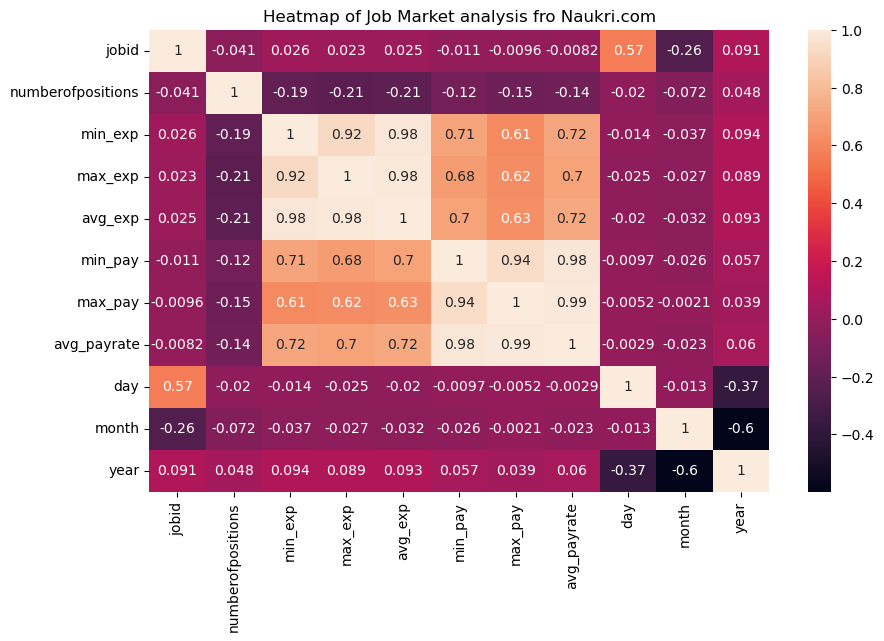

In [87]:
# Lets create a heatmap to find correlation between numerical features of data

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Job Market analysis fro Naukri.com')

In [88]:
# we can also find correlation of individual features

df.corr()['min_pay']

jobid               -0.010856
numberofpositions   -0.121553
min_exp              0.709683
max_exp              0.677629
avg_exp              0.704354
min_pay              1.000000
max_pay              0.938850
avg_payrate          0.979315
day                 -0.009659
month               -0.025859
year                 0.057210
Name: min_pay, dtype: float64

- Now lets find the number of jobs for each company

In [95]:
# We will create a copy of the dataframe to avoid any changes in original

data=df.copy()

In [96]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_exp', 'max_exp', 'avg_exp', 'min_pay', 'max_pay',
       'avg_payrate', 'day', 'month', 'year'],
      dtype='object')

In [97]:
data['company'].value_counts()

Indian Institute of Technology Bombay                                                                         403
Confidential                                                                                                  393
National Institute of Industrial Engineering                                                                  185
Oracle India Pvt. Ltd.                                                                                        151
JPMorgan Chase                                                                                                135
                                                                                                             ... 
Bello Jewels Pvt Ltd                                                                                            1
ITG Telematics Pvt Ltd                                                                                          1
Genuine Management Services Pvt. Limited hiring for Leading Client of Genuine Management

In [98]:
comp=data['company'].value_counts().reset_index()
comp

,index,company
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135
...,...,...
8464,Bello Jewels Pvt Ltd,1
8465,ITG Telematics Pvt Ltd,1
8466,Genuine Management Services Pvt. Limited hirin...,1
8467,AJAX Consulting hiring for a large Japanese MNC,1


In [99]:
comp.columns=['company','Number of jobs']
comp

,company,Number of jobs
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135
...,...,...
8464,Bello Jewels Pvt Ltd,1
8465,ITG Telematics Pvt Ltd,1
8466,Genuine Management Services Pvt. Limited hirin...,1
8467,AJAX Consulting hiring for a large Japanese MNC,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indian Institute of Technology Bombay'),
  Text(1, 0, 'Confidential'),
  Text(2, 0, 'National Institute of Industrial Engineering'),
  Text(3, 0, 'Oracle India Pvt. Ltd.'),
  Text(4, 0, 'JPMorgan Chase'),
  Text(5, 0, 'Godrej Industries Ltd'),
  Text(6, 0, 'Unitforce technologies Pvt. Ltd.'),
  Text(7, 0, 'Capgemini'),
  Text(8, 0, 'HCL Technologies'),
  Text(9, 0, 'Axis Jobs')])

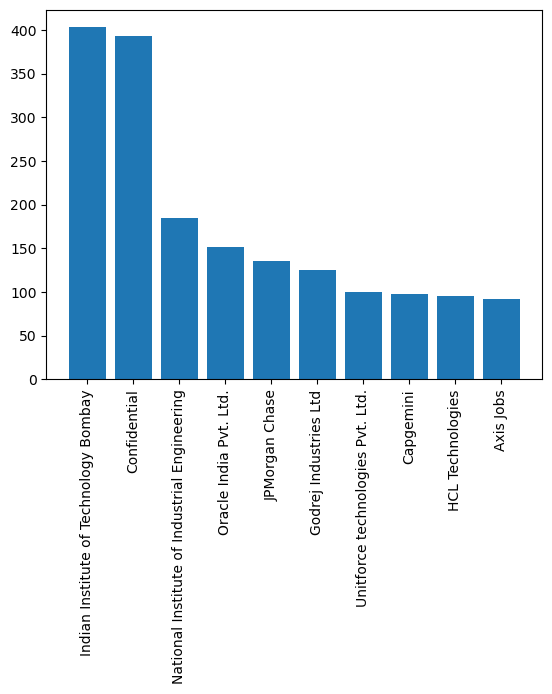

In [101]:
# First we will try to plot a bar chart using plt.bar for top 10 companies only

plt.bar(comp['company'][0:10],comp['Number of jobs'][0:10])
plt.xticks(rotation='vertical')

(array([], dtype=float64), [])

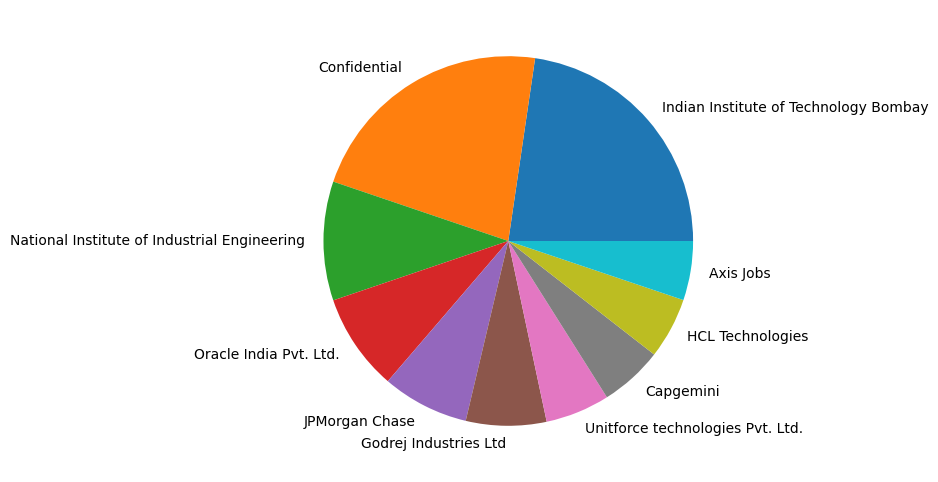

In [102]:
# Now we will view the same data in form of pie chart to see the actual distribution

plt.figure(figsize=(12,6))
plt.pie(labels=comp['company'][0:10],x=comp['Number of jobs'][0:10])
plt.xticks(rotation='vertical')

In [103]:
# We can also automate this by using functions

def perform_analysis(data,feature,col1,col2,chart):
    dataframe=data[feature].value_counts().reset_index()
    dataframe.columns=[col1,col2]
    
    if chart==1:
        plt.bar(dataframe[col1][0:10],dataframe[col2][0:10])
        plt.xticks(rotation='vertical')
        
    if chart==2:
        plt.pie(labels=dataframe[col1][0:10],x=dataframe[col2][0:10])
        plt.xticks(rotation='vertical')

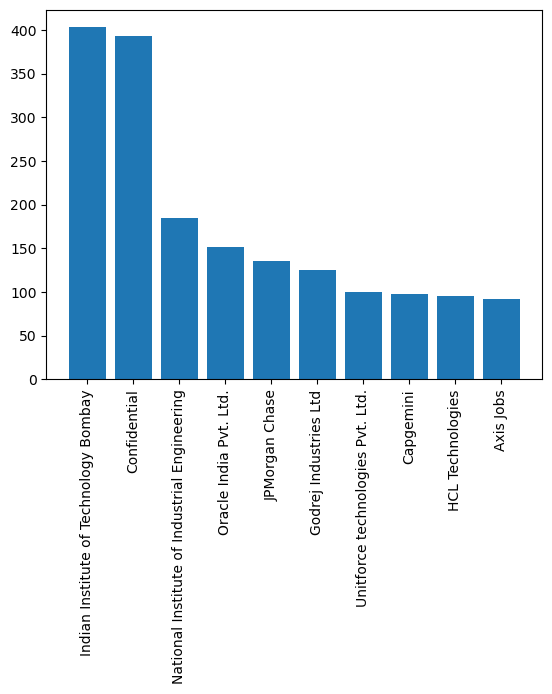

In [104]:
perform_analysis(data,'company','company','Number of Jobs',1)

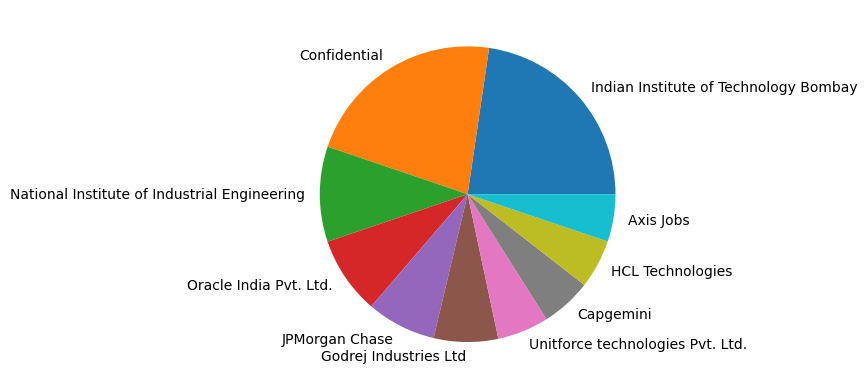

In [105]:
perform_analysis(data,'company','company','Number of Jobs',2)

 ##### Now we need to perform follwing analysis
 
 - Industry based jobs analysis
 - Job Title analysis
 - Skills analysis
 - Jon=b Location analysis

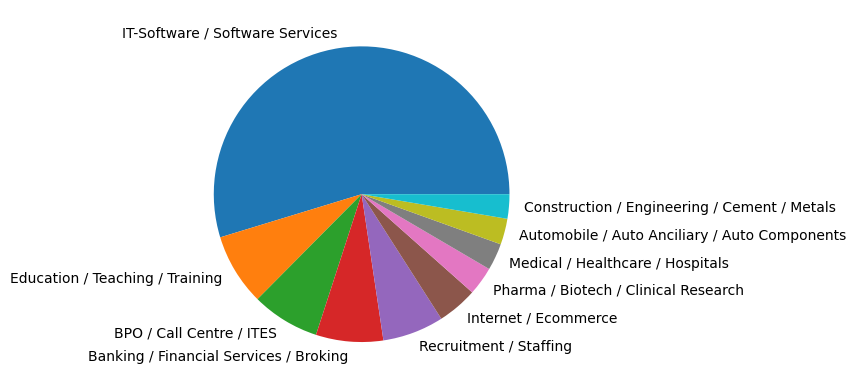

In [106]:
perform_analysis(data,'industry','Industries','Number of Jobs',2)

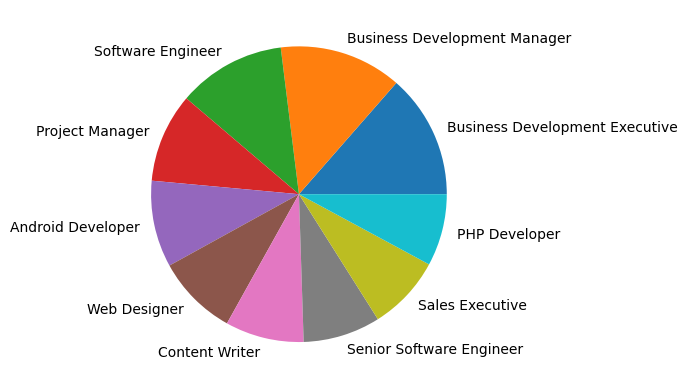

In [107]:
perform_analysis(data,'jobtitle','Job Titles','Number of Jobs',2)

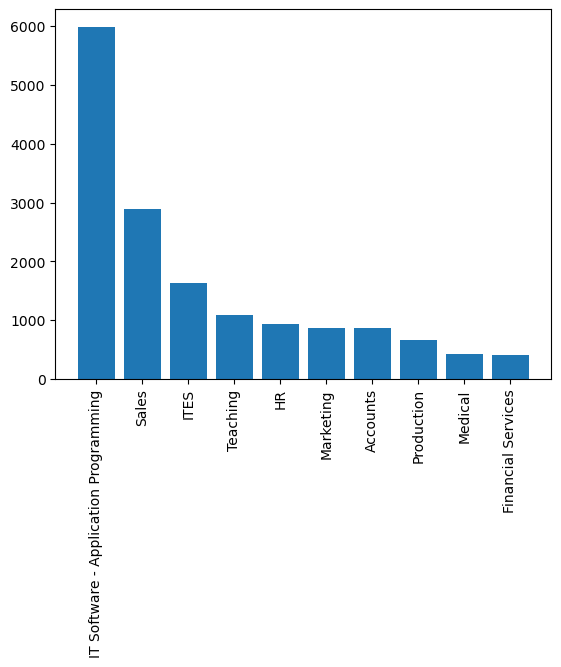

In [108]:
perform_analysis(data,'skills','Skills','Number of Jobs',1)

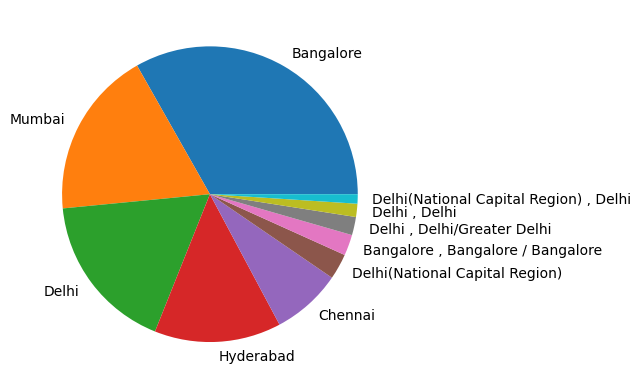

In [109]:
perform_analysis(data,'joblocation_address','City','Number of Jobs',2)

### Now, lets try to find relationship between 2 numerical features e.g. min_pay and min_exp. This would be case of Bi-variate analysis for which we can use Regression, Scatterplot or Boxplot (along with Stripplot)

Text(0.5, 1.0, 'Stripplots between Minimum Experience and Minimum Pay')

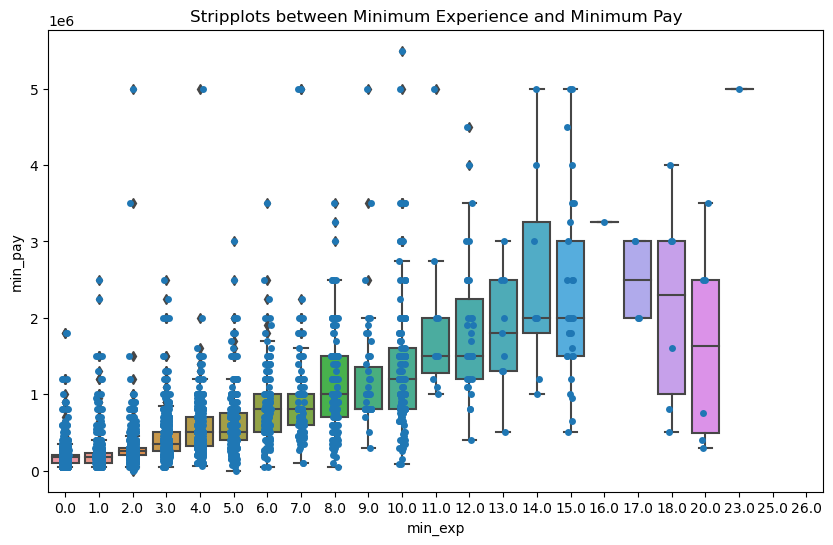

In [110]:
plt.figure(figsize=(10,6))
sns.stripplot(x='min_exp',y='min_pay',data=data)
sns.boxplot(x='min_exp',y='min_pay',data=data)
plt.title('Stripplots between Minimum Experience and Minimum Pay')

Text(0.5, 1.0, 'Stripplots between Maximum Experience and Maximum Pay')

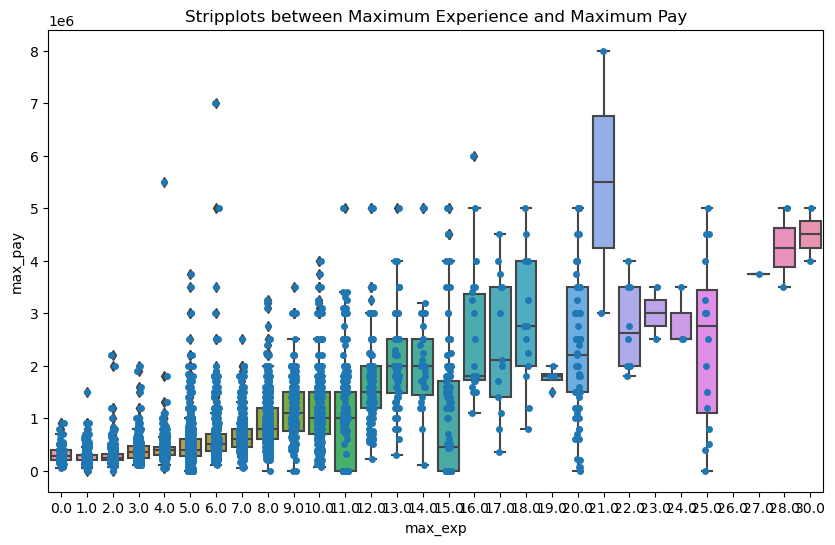

In [111]:
plt.figure(figsize=(10,6))
sns.stripplot(x='max_exp',y='max_pay',data=data)
sns.boxplot(x='max_exp',y='max_pay',data=data)
plt.title('Stripplots between Maximum Experience and Maximum Pay')

### Now we will find median of maximum pay for each industry and what is the top rated skills

In [112]:
data[['max_pay','industry']].groupby(['industry']).median().sort_values(by='max_pay',ascending=False).head(10)

,max_pay
industry,
Pulp and Paper,1312500.0
Strategy / Management Consulting Firms,1200000.0
Glass / Glassware,1025000.0
Telecom/ISP,950000.0
Tyres,900000.0
Ceramics / Sanitary ware,900000.0
IT-Software / Software Services,800000.0
Aviation / Aerospace Firms,800000.0
Water Treatment / Waste Management,800000.0


<Axes: xlabel='industry'>

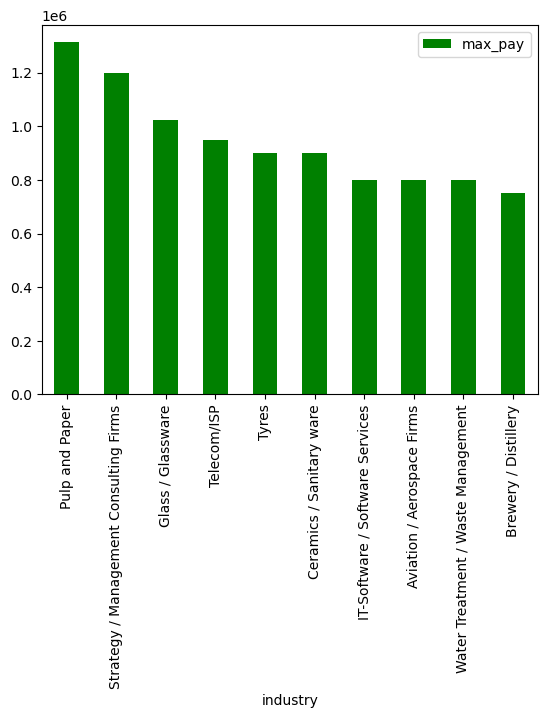

In [113]:
data[['max_pay','industry']].groupby(['industry']).median().sort_values(by='max_pay',ascending=False).head(10).plot(kind='bar', color='green')

In [114]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_exp', 'max_exp', 'avg_exp', 'min_pay', 'max_pay',
       'avg_payrate', 'day', 'month', 'year'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'ITES'),
  Text(1, 0, 'Marketing'),
  Text(2, 0, 'IT Software - Application Programming'),
  Text(3, 0, 'Accounts'),
  Text(4, 0, 'Production'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'IT Software - Other'),
  Text(7, 0, 'Executive Assistant'),
  Text(8, 0, 'IT Software - Mobile'),
  Text(9, 0, 'Engineering Design'),
  Text(10, 0, 'Financial Services'),
  Text(11, 0, 'Hotels'),
  Text(12, 0, 'IT Software - QA & Testing'),
  Text(13, 0, 'HR'),
  Text(14, 0, 'Supply Chain'),
  Text(15, 0, 'IT Software - Network Administration'),
  Text(16, 0, 'Architecture'),
  Text(17, 0, 'Legal'),
  Text(18, 0, 'Site Engineering'),
  Text(19, 0, 'Journalism'),
  Text(20, 0, 'IT Software - DBA'),
  Text(21, 0, 'Strategy'),
  Text(22, 0, 'Medical'),
  Text(23, 0, 'Design'),
  Text(24, 0, 'Def

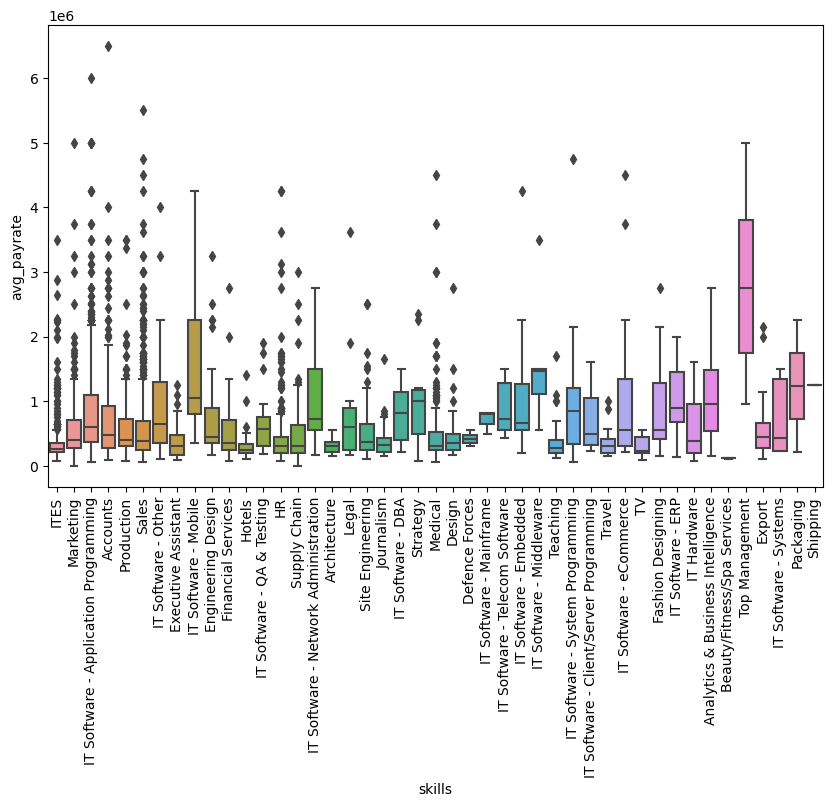

In [115]:
plt.figure(figsize=(10,6))
sns.boxplot(x='skills',y='avg_payrate',data=data)
plt.xticks(rotation='vertical')

<Axes: xlabel='skills'>

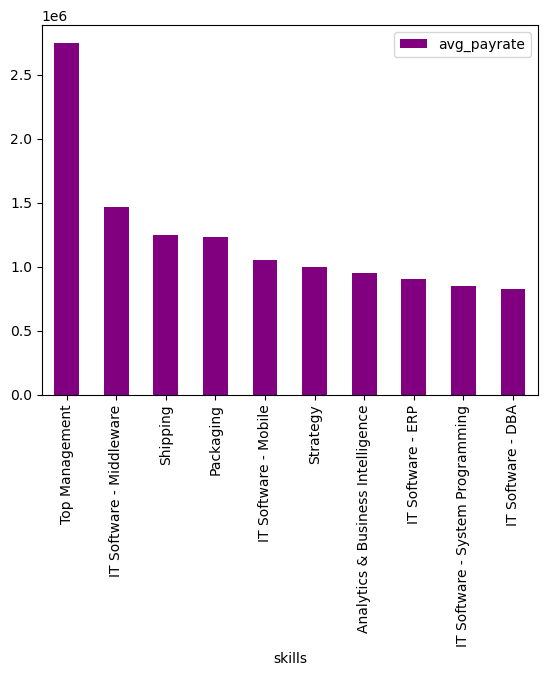

In [116]:
data[['avg_payrate','skills']].groupby(['skills']).median().sort_values(by='avg_payrate',ascending=False).head(10).plot(kind='bar', color='purple')

### Now we will analyse the available position in the industry

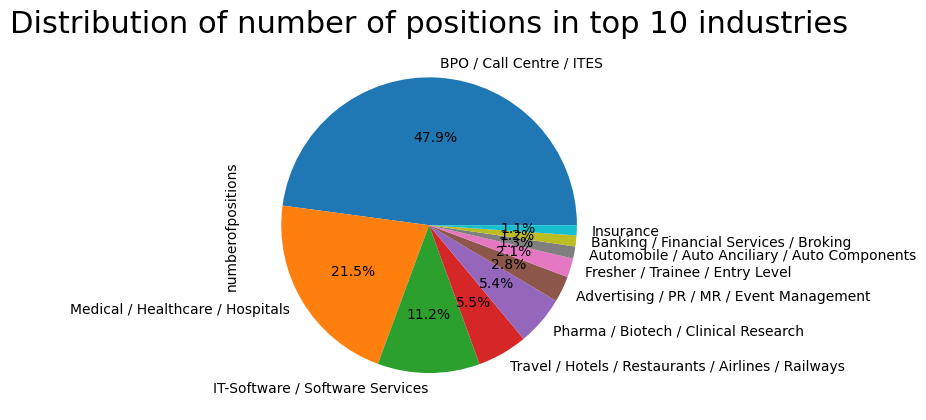

In [117]:
data.groupby('industry')['numberofpositions'].sum().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of number of positions in top 10 industries',fontsize=22)
plt.show()